# Final Project - Logistic Regression
Logistic Regression for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

# Imports

In [111]:
# Importing the libraries to be used:
import numpy as np
import numpy.random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [112]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = -1.
    y[y==3] = 0.
    y[y>3] = 1.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(f'ScaledX[:10, :]:\n{X[:10, :]}') # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

### Confusion Matrix and Classification Analysis

In [113]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Logistic Regression with Lasso (L1) Regularization

In [114]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model
# with different values of C.
def logreg_model(c , X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # Create the Logistic Regression model object as described above and save it to logreg
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga', max_iter=1e6)

    # Fit the model on the training set
    logreg.fit(X_train, y_train)

    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, y_train)
    acc_train_logreg.append(acc_train)
    print(f'Logistic - L1, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg.predict(X_train)
    # confusion_and_classification(y_train, Yhat_train)

    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, y_test)
    acc_test_logreg.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg.predict(X_test)
    confusion_and_classification(y_test, Yhat_test)

# Logistic Regression with Ridge(L2) Regularization.

In [115]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test, acc_train_logreg2, acc_test_logreg2):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.

    # Create the Logistic Regression model object as described above and save it to logreg2
    logreg2 = linear_model.LogisticRegression(C=c, max_iter=1e6)

    # Fit the model on the training set
    logreg2.fit(X_train, Y_train)

    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print(f'Logistic - L2, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction on training set
    Yhat_train = logreg2.predict(X_train)
    # confusion_and_classification(y_train, Yhat_train)

    # Adding testing accuracy to acc_test_logreg2
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction on test set
    Yhat_test = logreg2.predict(X_test)
    confusion_and_classification(y_test, Yhat_test)

In [116]:
def train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2):
    # L1
    acc_train_logreg = []
    acc_test_logreg = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
    # c_logreg = np.geomspace(0.1, 50, num=16)
    for c in c_logreg:
        logreg_model(c, X_train, y_train, X_test, y_test, acc_train_logreg, acc_test_logreg)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg, acc_train_logreg, color='red', label='Training Accuracy')
    plt.plot(c_logreg, acc_test_logreg, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L1 - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # L2
    acc_train_logreg2 = []
    acc_test_logreg2 = []
    # c_logreg2 = c_logreg
    for c in c_logreg2:
        logreg2_model(c, X_train, y_train, X_test, y_test, acc_train_logreg2, acc_test_logreg2)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_logreg2, acc_train_logreg2, color='red', label='Training Accuracy')
    plt.plot(c_logreg2, acc_test_logreg2, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('L2 - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [117]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [118]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([638, 217,   0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[-1.  0.  0. -1. -1. -1.  0. -1.  0. -1.]
X[:10, :]:
[[7.4000e+00 6.4000e-01 7.0000e-02 1.8000e+00 1.0000e-01 8.0000e+00
  2.3000e+01 9.9610e-01 3.3000e+00 5.8000e-01 9.6000e+00]
 [1.1100e+01 4.5000e-01 7.3000e-01 3.2000e+00 6.6000e-02 6.0000e+00
  2.2000e+01 9.9860e-01 3.1700e+00 6.6000e-01 1.1200e+01]
 [6.9000e+00 5.4000e-01 4.0000e-02 3.0000e+00 7.7000e-02 7.0000e+00
  2.7000e+01 9.9870e-01 3.6900e+00 9.1000e-01 9.4000e+00]
 [8.3000e+00 6.5500e-01 1.2000e-01 2.3000e+00 8.3000e-02 1.5000e+01
  1.1300e+02 9.9660e-01 3.1700e+00 6.6000e-01 9.8000e+00]
 [9.4000e+00 4.0000e-01 4.7000e-01 2.5000e+00 8.7000e-02 6.0000e+00
  2.0000e+01 9.9772e-01 3.1500e+00 5.0000e-01 1.0500e+01]
 [8.5000e+00 3.4000e-01 4.4000e-01 1.7000e+00 7.9000e-02 6.0000e+

Logistic - L1, Train Accuracy = 0.6223612197028929, C=0.06
Test Accuracy = 0.6125


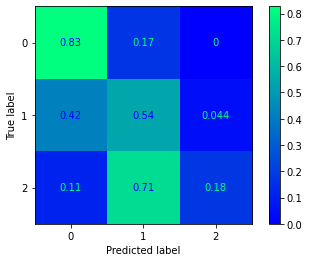

              precision    recall  f1-score   support

        -1.0       0.65      0.83      0.73       139
         0.0       0.57      0.54      0.55       136
         1.0       0.57      0.18      0.27        45
		 R2 Score: 0.11118215969946443

Logistic - L1, Train Accuracy = 0.6286161063330727, C=0.0746819815318101
Test Accuracy = 0.6125


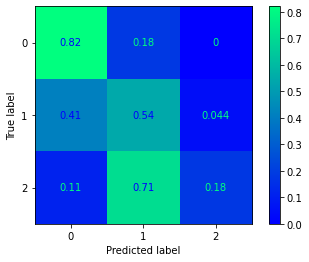

              precision    recall  f1-score   support

        -1.0       0.65      0.82      0.73       139
         0.0       0.56      0.54      0.55       136
         1.0       0.57      0.18      0.27        45
		 R2 Score: 0.11118215969946443

Logistic - L1, Train Accuracy = 0.6333072713057076, C=0.09295663942529371
Test Accuracy = 0.6125


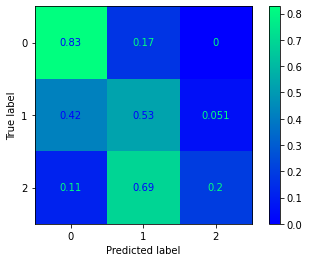

              precision    recall  f1-score   support

        -1.0       0.65      0.83      0.73       139
         0.0       0.57      0.53      0.55       136
         1.0       0.56      0.20      0.30        45
		 R2 Score: 0.11118215969946443

Logistic - L1, Train Accuracy = 0.6387802971071149, C=0.11570310048031528
Test Accuracy = 0.6125


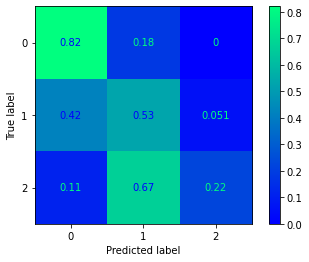

              precision    recall  f1-score   support

        -1.0       0.65      0.82      0.72       139
         0.0       0.57      0.53      0.55       136
         1.0       0.59      0.22      0.32        45
		 R2 Score: 0.11118215969946443

Logistic - L1, Train Accuracy = 0.6403440187646599, C=0.14401561355406786
Test Accuracy = 0.603125


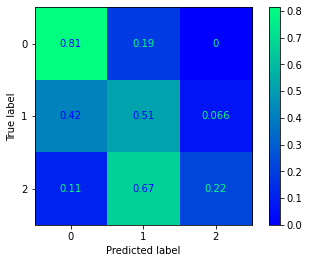

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.51      0.53       136
         1.0       0.53      0.22      0.31        45
		 R2 Score: 0.09199904084405719

Logistic - L1, Train Accuracy = 0.6395621579358874, C=0.17925618986228659
Test Accuracy = 0.603125


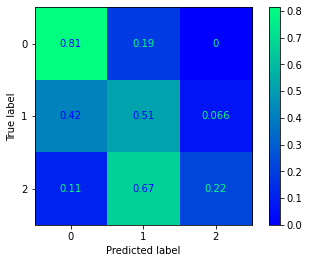

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.51      0.53       136
         1.0       0.53      0.22      0.31        45
		 R2 Score: 0.09199904084405719

Logistic - L1, Train Accuracy = 0.6379984362783424, C=0.22312012434596556
Test Accuracy = 0.60625


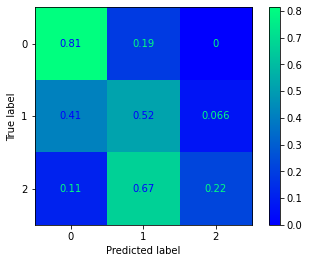

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.52      0.54       136
         1.0       0.53      0.22      0.31        45
		 R2 Score: 0.09839341379585953

Logistic - L1, Train Accuracy = 0.6395621579358874, C=0.2777175500963428
Test Accuracy = 0.6125


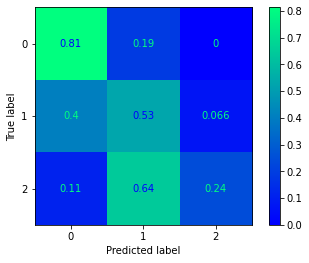

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.57      0.53      0.55       136
         1.0       0.55      0.24      0.34        45
		 R2 Score: 0.11118215969946443

Logistic - L1, Train Accuracy = 0.6411258795934324, C=0.34567494912257696
Test Accuracy = 0.61875


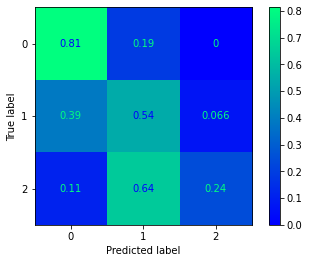

              precision    recall  f1-score   support

        -1.0       0.66      0.81      0.73       139
         0.0       0.57      0.54      0.56       136
         1.0       0.55      0.24      0.34        45
		 R2 Score: 0.12397090560306923

Logistic - L1, Train Accuracy = 0.6395621579358874, C=0.4302615027730281
Test Accuracy = 0.61875


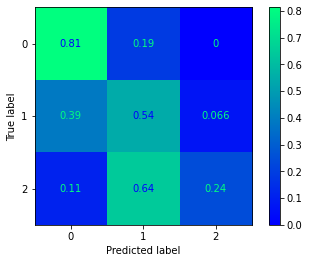

              precision    recall  f1-score   support

        -1.0       0.66      0.81      0.73       139
         0.0       0.57      0.54      0.56       136
         1.0       0.55      0.24      0.34        45
		 R2 Score: 0.12397090560306923

Logistic - L1, Train Accuracy = 0.6411258795934324, C=0.5355463600657356
Test Accuracy = 0.615625


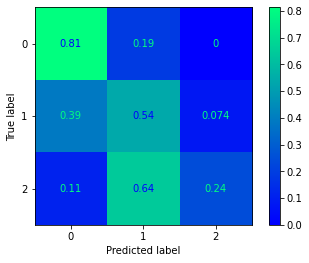

              precision    recall  f1-score   support

        -1.0       0.66      0.81      0.73       139
         0.0       0.57      0.54      0.55       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.11757653265126677

Logistic - L1, Train Accuracy = 0.6395621579358874, C=0.6665943895309565
Test Accuracy = 0.609375


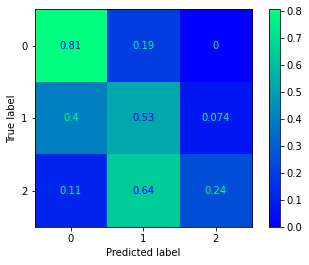

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.53      0.55       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.10478778674766198

Logistic - L1, Train Accuracy = 0.6387802971071149, C=0.8297098314693189
Test Accuracy = 0.609375


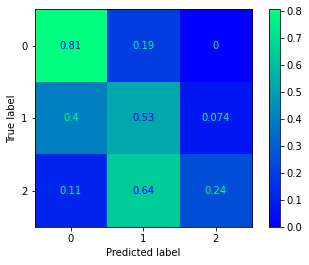

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.53      0.55       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.10478778674766198

Logistic - L1, Train Accuracy = 0.6387802971071149, C=1.0327395718425485
Test Accuracy = 0.60625


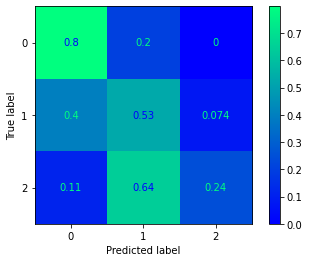

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L1, Train Accuracy = 0.6387802971071149, C=1.2854506271919115
Test Accuracy = 0.60625


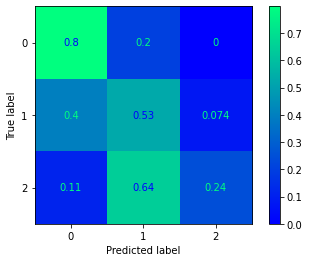

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L1, Train Accuracy = 0.6395621579358874, C=1.6
Test Accuracy = 0.60625


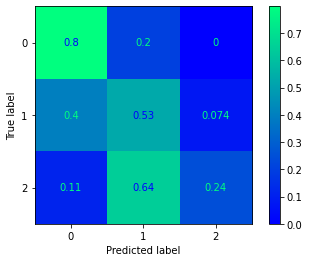

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953



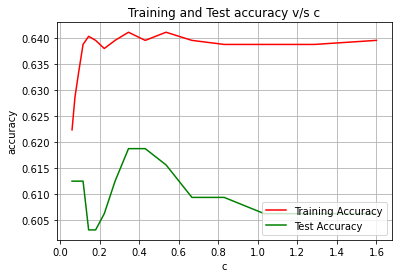

Logistic - L2, Train Accuracy = 0.6411258795934324, C=0.06
Test Accuracy = 0.615625


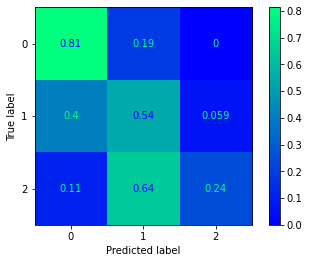

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.57      0.54      0.55       136
         1.0       0.58      0.24      0.34        45
		 R2 Score: 0.11757653265126677

Logistic - L2, Train Accuracy = 0.6387802971071149, C=0.0746819815318101
Test Accuracy = 0.615625


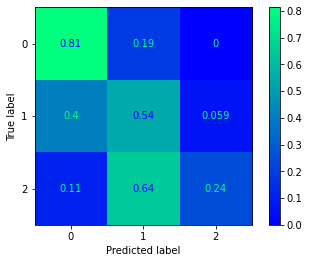

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.57      0.54      0.55       136
         1.0       0.58      0.24      0.34        45
		 R2 Score: 0.11757653265126677

Logistic - L2, Train Accuracy = 0.6379984362783424, C=0.09295663942529371
Test Accuracy = 0.6125


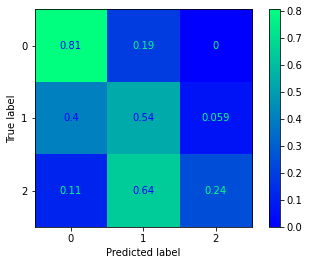

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.57      0.54      0.55       136
         1.0       0.58      0.24      0.34        45
		 R2 Score: 0.11118215969946443

Logistic - L2, Train Accuracy = 0.63721657544957, C=0.11570310048031528
Test Accuracy = 0.6125


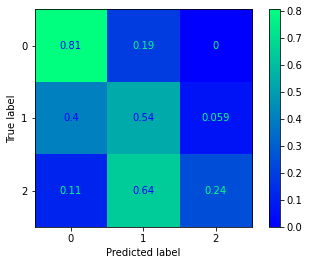

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.57      0.54      0.55       136
         1.0       0.58      0.24      0.34        45
		 R2 Score: 0.11118215969946443

Logistic - L2, Train Accuracy = 0.6356528537920251, C=0.14401561355406786
Test Accuracy = 0.609375


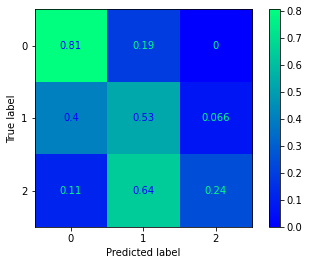

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.53      0.55       136
         1.0       0.55      0.24      0.34        45
		 R2 Score: 0.10478778674766198

Logistic - L2, Train Accuracy = 0.6348709929632526, C=0.17925618986228659
Test Accuracy = 0.609375


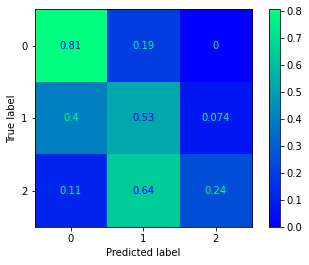

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.53      0.55       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.10478778674766198

Logistic - L2, Train Accuracy = 0.6356528537920251, C=0.22312012434596556
Test Accuracy = 0.609375


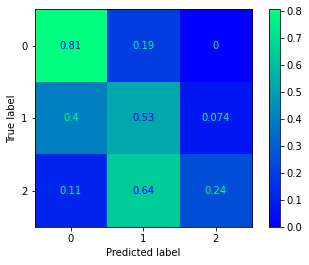

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.53      0.55       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.10478778674766198

Logistic - L2, Train Accuracy = 0.6379984362783424, C=0.2777175500963428
Test Accuracy = 0.609375


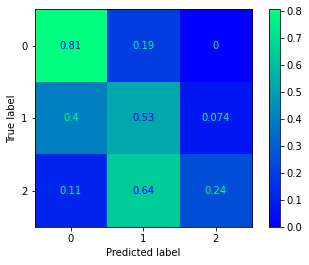

              precision    recall  f1-score   support

        -1.0       0.65      0.81      0.72       139
         0.0       0.56      0.53      0.55       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.10478778674766198

Logistic - L2, Train Accuracy = 0.6387802971071149, C=0.34567494912257696
Test Accuracy = 0.60625


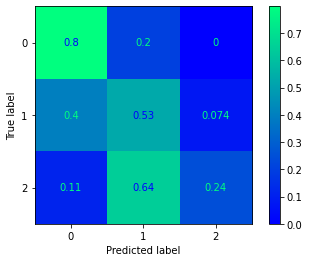

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6395621579358874, C=0.4302615027730281
Test Accuracy = 0.60625


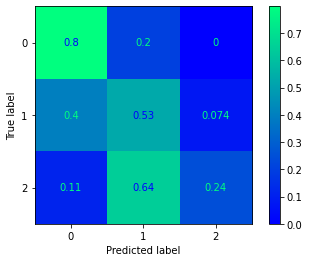

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6411258795934324, C=0.5355463600657356
Test Accuracy = 0.60625


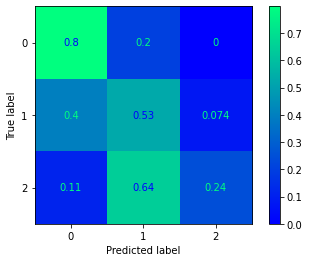

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6419077404222049, C=0.6665943895309565
Test Accuracy = 0.60625


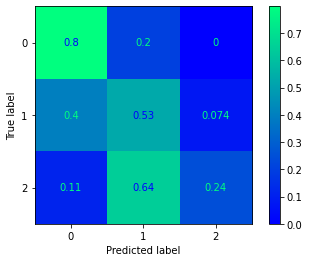

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6419077404222049, C=0.8297098314693189
Test Accuracy = 0.60625


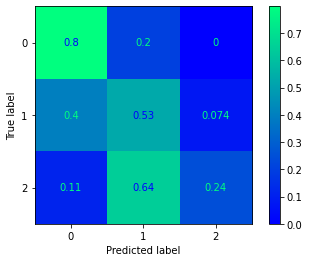

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6419077404222049, C=1.0327395718425485
Test Accuracy = 0.60625


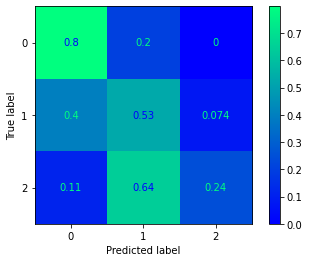

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6419077404222049, C=1.2854506271919115
Test Accuracy = 0.60625


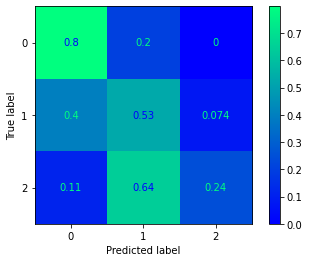

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953

Logistic - L2, Train Accuracy = 0.6419077404222049, C=1.6
Test Accuracy = 0.60625


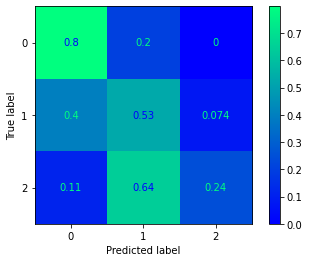

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.72       139
         0.0       0.56      0.53      0.54       136
         1.0       0.52      0.24      0.33        45
		 R2 Score: 0.09839341379585953



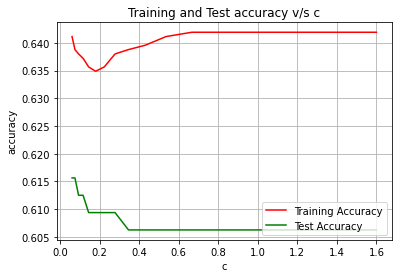

In [119]:
num_of_different_c = 16
c_logreg = np.geomspace(0.06, 1.6, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6520719311962471, C=0.06
Test Accuracy = 0.609375


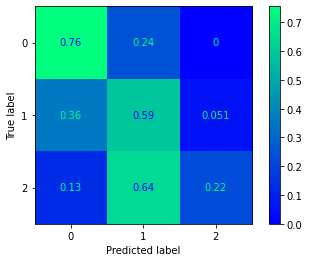

              precision    recall  f1-score   support

        -1.0       0.66      0.76      0.70       139
         0.0       0.56      0.59      0.57       136
         1.0       0.59      0.22      0.32        45
		 R2 Score: 0.08560466789225474

Logistic - L1, Train Accuracy = 0.655199374511337, C=0.07130946302904165
Test Accuracy = 0.61875


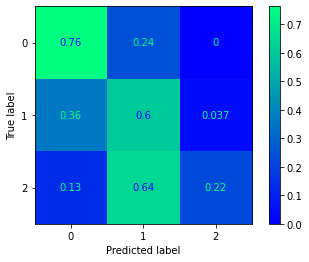

              precision    recall  f1-score   support

        -1.0       0.66      0.76      0.71       139
         0.0       0.57      0.60      0.59       136
         1.0       0.67      0.22      0.33        45
		 R2 Score: 0.10478778674766198

Logistic - L1, Train Accuracy = 0.6583268178264269, C=0.08475065862483763
Test Accuracy = 0.625


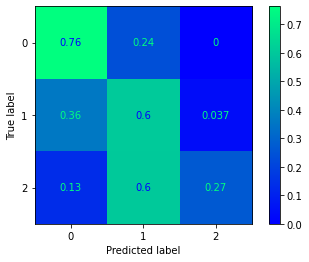

              precision    recall  f1-score   support

        -1.0       0.66      0.76      0.71       139
         0.0       0.58      0.60      0.59       136
         1.0       0.71      0.27      0.39        45
		 R2 Score: 0.11757653265126677

Logistic - L1, Train Accuracy = 0.6614542611415168, C=0.10072539929824649
Test Accuracy = 0.634375


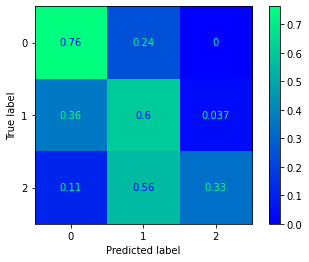

              precision    recall  f1-score   support

        -1.0       0.66      0.76      0.71       139
         0.0       0.59      0.60      0.59       136
         1.0       0.75      0.33      0.46        45
		 R2 Score: 0.15594277036208126

Logistic - L1, Train Accuracy = 0.6684910086004691, C=0.1197112356223961
Test Accuracy = 0.634375


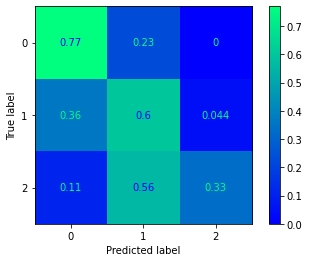

              precision    recall  f1-score   support

        -1.0       0.66      0.77      0.71       139
         0.0       0.59      0.60      0.59       136
         1.0       0.71      0.33      0.45        45
		 R2 Score: 0.15594277036208126

Logistic - L1, Train Accuracy = 0.6763096168881939, C=0.1422757321796025
Test Accuracy = 0.64375


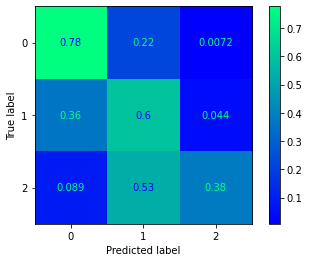

              precision    recall  f1-score   support

        -1.0       0.67      0.78      0.72       139
         0.0       0.60      0.60      0.60       136
         1.0       0.71      0.38      0.49        45
		 R2 Score: 0.1751258892174885

Logistic - L1, Train Accuracy = 0.6817826426896012, C=0.16909343439651997
Test Accuracy = 0.65


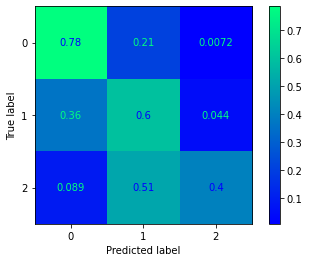

              precision    recall  f1-score   support

        -1.0       0.67      0.78      0.72       139
         0.0       0.61      0.60      0.60       136
         1.0       0.72      0.40      0.51        45
		 R2 Score: 0.1879146351210934

Logistic - L1, Train Accuracy = 0.6825645035183737, C=0.200966033475872
Test Accuracy = 0.65


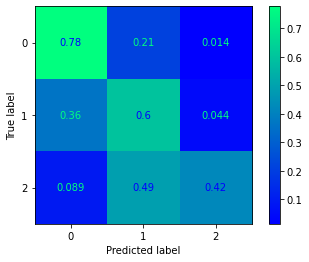

              precision    recall  f1-score   support

        -1.0       0.67      0.78      0.72       139
         0.0       0.61      0.60      0.60       136
         1.0       0.70      0.42      0.53        45
		 R2 Score: 0.16873151626568617

Logistic - L1, Train Accuracy = 0.6794370602032838, C=0.23884633223734736
Test Accuracy = 0.64375


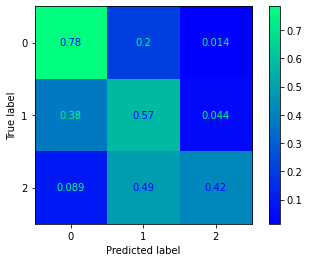

              precision    recall  f1-score   support

        -1.0       0.66      0.78      0.72       139
         0.0       0.61      0.57      0.59       136
         1.0       0.70      0.42      0.53        45
		 R2 Score: 0.15594277036208126

Logistic - L1, Train Accuracy = 0.6864738076622361, C=0.283866728305022
Test Accuracy = 0.64375


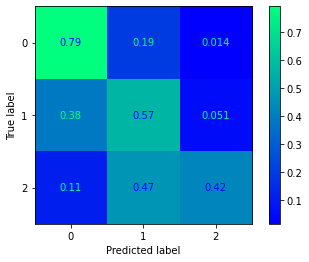

              precision    recall  f1-score   support

        -1.0       0.66      0.79      0.72       139
         0.0       0.62      0.57      0.59       136
         1.0       0.68      0.42      0.52        45
		 R2 Score: 0.13675965150667402

Logistic - L1, Train Accuracy = 0.6825645035183737, C=0.33737306612069967
Test Accuracy = 0.634375


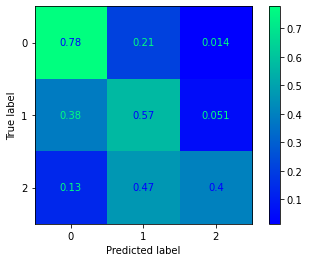

              precision    recall  f1-score   support

        -1.0       0.65      0.78      0.71       139
         0.0       0.61      0.57      0.59       136
         1.0       0.67      0.40      0.50        45
		 R2 Score: 0.09839341379585953

Logistic - L1, Train Accuracy = 0.6810007818608288, C=0.4009648697588076
Test Accuracy = 0.628125


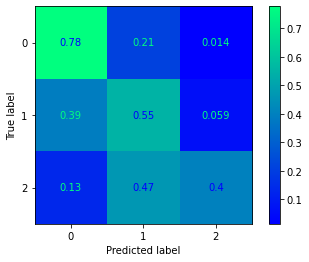

              precision    recall  f1-score   support

        -1.0       0.65      0.78      0.71       139
         0.0       0.60      0.55      0.57       136
         1.0       0.64      0.40      0.49        45
		 R2 Score: 0.08560466789225474

Logistic - L1, Train Accuracy = 0.6794370602032838, C=0.47654315926683666
Test Accuracy = 0.628125


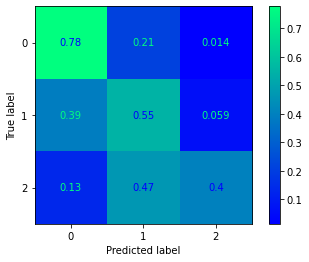

              precision    recall  f1-score   support

        -1.0       0.65      0.78      0.71       139
         0.0       0.60      0.55      0.57       136
         1.0       0.64      0.40      0.49        45
		 R2 Score: 0.08560466789225474

Logistic - L1, Train Accuracy = 0.6794370602032838, C=0.5663672799580199
Test Accuracy = 0.625


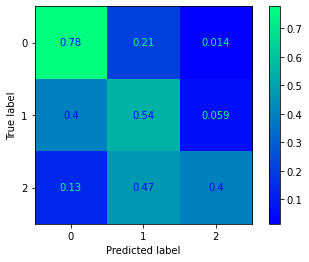

              precision    recall  f1-score   support

        -1.0       0.64      0.78      0.70       139
         0.0       0.60      0.54      0.57       136
         1.0       0.64      0.40      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L1, Train Accuracy = 0.6841282251759186, C=0.6731224435170884
Test Accuracy = 0.628125


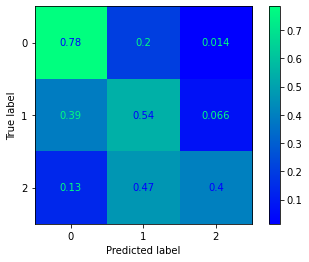

              precision    recall  f1-score   support

        -1.0       0.65      0.78      0.71       139
         0.0       0.60      0.54      0.57       136
         1.0       0.62      0.40      0.49        45
		 R2 Score: 0.08560466789225474

Logistic - L1, Train Accuracy = 0.6864738076622361, C=0.8
Test Accuracy = 0.625


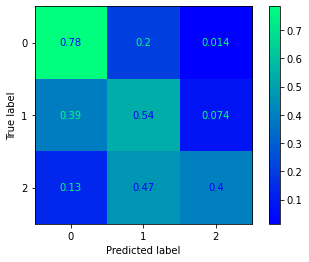

              precision    recall  f1-score   support

        -1.0       0.65      0.78      0.71       139
         0.0       0.60      0.54      0.57       136
         1.0       0.60      0.40      0.48        45
		 R2 Score: 0.07921029494045229



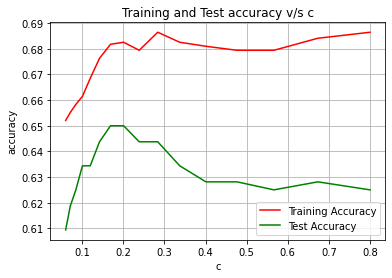

Logistic - L2, Train Accuracy = 0.6833463643471462, C=0.06
Test Accuracy = 0.621875


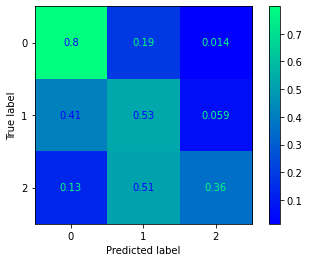

              precision    recall  f1-score   support

        -1.0       0.64      0.80      0.71       139
         0.0       0.60      0.53      0.56       136
         1.0       0.62      0.36      0.45        45
		 R2 Score: 0.07281592198864995

Logistic - L2, Train Accuracy = 0.6856919468334637, C=0.07130946302904165
Test Accuracy = 0.625


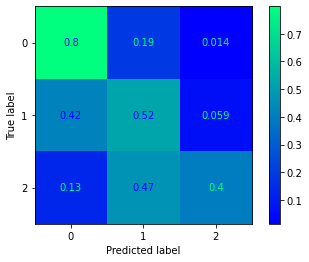

              precision    recall  f1-score   support

        -1.0       0.64      0.80      0.71       139
         0.0       0.60      0.52      0.56       136
         1.0       0.64      0.40      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6880375293197811, C=0.08475065862483763
Test Accuracy = 0.625


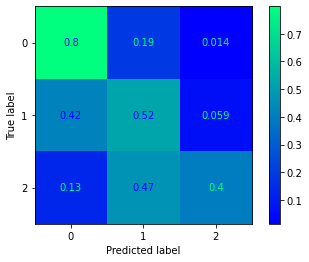

              precision    recall  f1-score   support

        -1.0       0.64      0.80      0.71       139
         0.0       0.60      0.52      0.56       136
         1.0       0.64      0.40      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6849100860046912, C=0.10072539929824649
Test Accuracy = 0.625


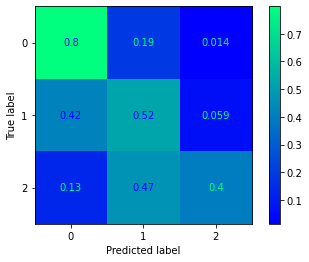

              precision    recall  f1-score   support

        -1.0       0.64      0.80      0.71       139
         0.0       0.60      0.52      0.56       136
         1.0       0.64      0.40      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6872556684910086, C=0.1197112356223961
Test Accuracy = 0.625


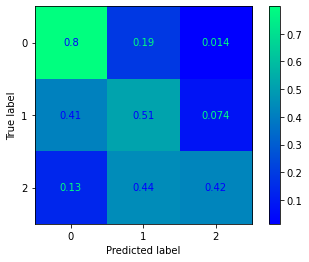

              precision    recall  f1-score   support

        -1.0       0.64      0.80      0.71       139
         0.0       0.60      0.51      0.56       136
         1.0       0.61      0.42      0.50        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6903831118060985, C=0.1422757321796025
Test Accuracy = 0.621875


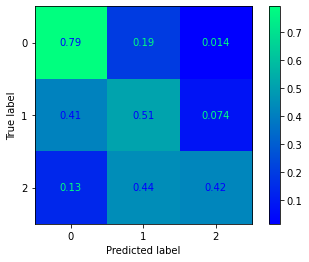

              precision    recall  f1-score   support

        -1.0       0.64      0.79      0.71       139
         0.0       0.60      0.51      0.55       136
         1.0       0.61      0.42      0.50        45
		 R2 Score: 0.07281592198864995

Logistic - L2, Train Accuracy = 0.6903831118060985, C=0.16909343439651997
Test Accuracy = 0.621875


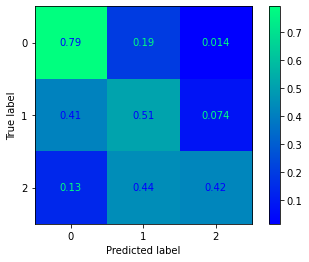

              precision    recall  f1-score   support

        -1.0       0.64      0.79      0.71       139
         0.0       0.60      0.51      0.55       136
         1.0       0.61      0.42      0.50        45
		 R2 Score: 0.07281592198864995

Logistic - L2, Train Accuracy = 0.689601250977326, C=0.200966033475872
Test Accuracy = 0.625


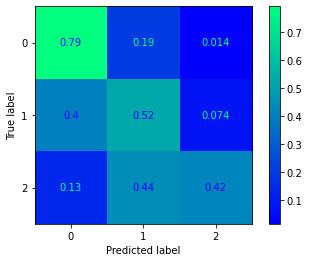

              precision    recall  f1-score   support

        -1.0       0.64      0.79      0.71       139
         0.0       0.60      0.52      0.56       136
         1.0       0.61      0.42      0.50        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.691164972634871, C=0.23884633223734736
Test Accuracy = 0.625


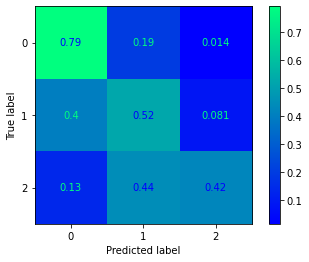

              precision    recall  f1-score   support

        -1.0       0.65      0.79      0.71       139
         0.0       0.60      0.52      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.689601250977326, C=0.283866728305022
Test Accuracy = 0.625


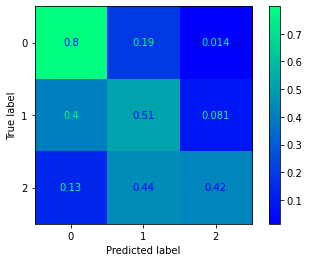

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.71       139
         0.0       0.60      0.51      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6888193901485535, C=0.33737306612069967
Test Accuracy = 0.621875


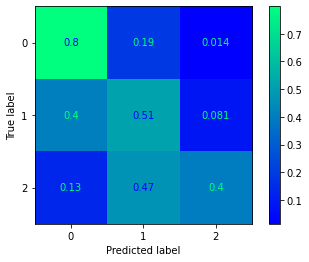

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.71       139
         0.0       0.60      0.51      0.55       136
         1.0       0.58      0.40      0.47        45
		 R2 Score: 0.07281592198864995

Logistic - L2, Train Accuracy = 0.6903831118060985, C=0.4009648697588076
Test Accuracy = 0.625


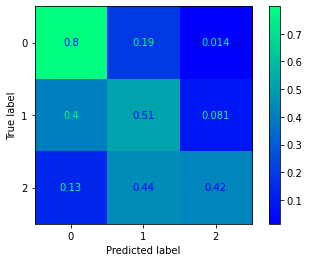

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.71       139
         0.0       0.60      0.51      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6903831118060985, C=0.47654315926683666
Test Accuracy = 0.625


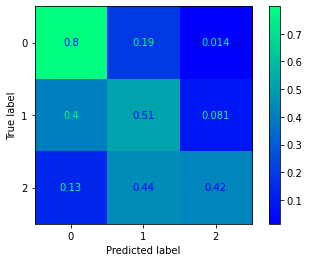

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.71       139
         0.0       0.60      0.51      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6950742767787333, C=0.5663672799580199
Test Accuracy = 0.625


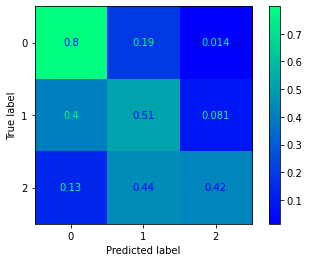

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.71       139
         0.0       0.60      0.51      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6950742767787333, C=0.6731224435170884
Test Accuracy = 0.625


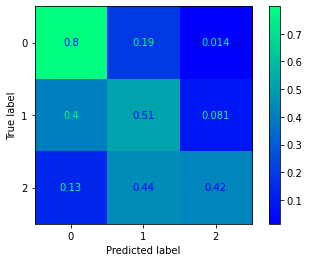

              precision    recall  f1-score   support

        -1.0       0.65      0.80      0.71       139
         0.0       0.60      0.51      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.07921029494045229

Logistic - L2, Train Accuracy = 0.6974198592650508, C=0.8
Test Accuracy = 0.625


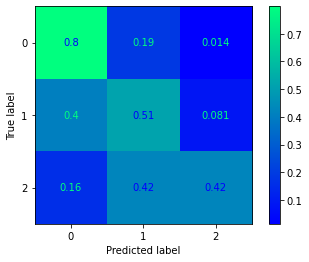

              precision    recall  f1-score   support

        -1.0       0.64      0.80      0.71       139
         0.0       0.61      0.51      0.56       136
         1.0       0.59      0.42      0.49        45
		 R2 Score: 0.06002717608504504



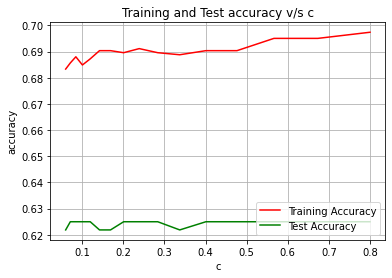

In [120]:
# Create an object of PolynomialFeatures(2)
poly = PolynomialFeatures(2)
# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train White Wines Data

In [121]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_white)

Original y hist: (array([   0,    0,    0,   20,  163, 1457, 2198,  880,  180]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
Current y hist: (array([2198, 1060,    0]), array([-0.5,  0.5,  1.5,  2.5]))
y min: -1.0, y max: 1.0
The shape of the wines dataset: (4898, 12)
y[:10]:
[ 0.  0. -1.  0.  0.  1.  1.  0. -1.  0.]
X[:10, :]:
[[5.90000000e+00 2.00000000e-01 2.30000000e-01 1.50000000e+00
  3.70000000e-02 3.80000000e+01 9.30000000e+01 9.90210000e-01
  3.36000000e+00 4.90000000e-01 1.20000000e+01]
 [6.20000000e+00 2.20000000e-01 2.80000000e-01 2.20000000e+00
  4.00000000e-02 2.40000000e+01 1.25000000e+02 9.91700000e-01
  3.19000000e+00 4.80000000e-01 1.05000000e+01]
 [6.90000000e+00 2.80000000e-01 2.20000000e-01 1.00000000e+01
  5.20000000e-02 3.60000000e+01 1.31000000e+02 9.96960000e-01
  3.08000000e+00 4.60000000e-01 9.60000000e+00]
 [8.50000000e+00 2.50000000e-01 2.70000000e-01 4.70000000e+00
  3.10000000e-02 3.10000000e+01 9.20000000e+01 9.92200000e-01
  3.01000000e+00 3.30000000e-01 1.2

Logistic - L1, Train Accuracy = 0.5758039816232772, C=0.06
Test Accuracy = 0.5918367346938775


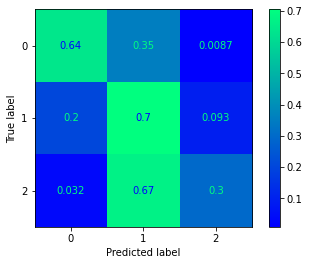

              precision    recall  f1-score   support

        -1.0       0.70      0.64      0.67       343
         0.0       0.53      0.70      0.60       420
         1.0       0.61      0.30      0.40       217
		 R2 Score: 0.20926811327693995

Logistic - L1, Train Accuracy = 0.5763144461459928, C=0.07130946302904165
Test Accuracy = 0.5948979591836735


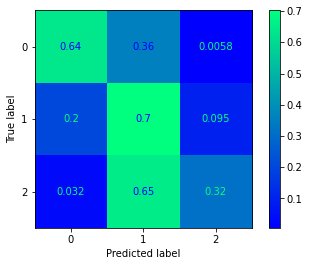

              precision    recall  f1-score   support

        -1.0       0.70      0.64      0.67       343
         0.0       0.53      0.70      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.22030158146377343

Logistic - L1, Train Accuracy = 0.5770801429300664, C=0.08475065862483763
Test Accuracy = 0.5938775510204082


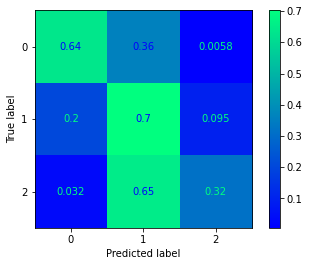

              precision    recall  f1-score   support

        -1.0       0.70      0.64      0.67       343
         0.0       0.53      0.70      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.2184626700993011

Logistic - L1, Train Accuracy = 0.5763144461459928, C=0.10072539929824649
Test Accuracy = 0.5969387755102041


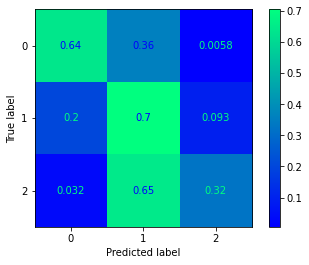

              precision    recall  f1-score   support

        -1.0       0.70      0.64      0.67       343
         0.0       0.53      0.70      0.61       420
         1.0       0.63      0.32      0.43       217
		 R2 Score: 0.2239794041927179

Logistic - L1, Train Accuracy = 0.5763144461459928, C=0.1197112356223961
Test Accuracy = 0.5938775510204082


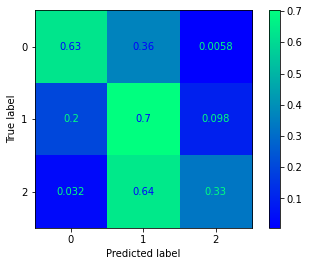

              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66       343
         0.0       0.53      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.2184626700993011

Logistic - L1, Train Accuracy = 0.577590607452782, C=0.1422757321796025
Test Accuracy = 0.5928571428571429


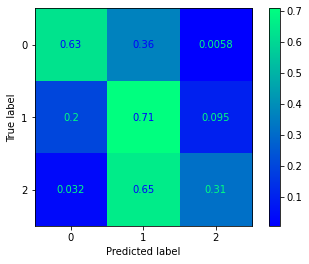

              precision    recall  f1-score   support

        -1.0       0.71      0.63      0.67       343
         0.0       0.53      0.71      0.60       420
         1.0       0.62      0.31      0.42       217
		 R2 Score: 0.21662375873482886

Logistic - L1, Train Accuracy = 0.5778458397141398, C=0.16909343439651997
Test Accuracy = 0.5918367346938775


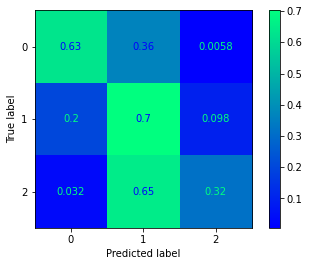

              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66       343
         0.0       0.53      0.70      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.21478484737035664

Logistic - L1, Train Accuracy = 0.5786115364982134, C=0.200966033475872
Test Accuracy = 0.5897959183673469


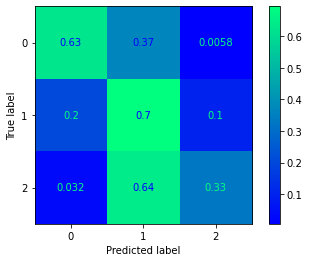

              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.21110702464141218

Logistic - L1, Train Accuracy = 0.577590607452782, C=0.23884633223734736
Test Accuracy = 0.5877551020408164


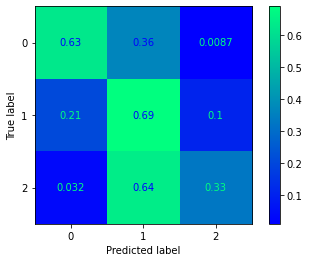

              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66       343
         0.0       0.52      0.69      0.60       420
         1.0       0.61      0.33      0.43       217
		 R2 Score: 0.20191246781905103

Logistic - L1, Train Accuracy = 0.5778458397141398, C=0.283866728305022
Test Accuracy = 0.5877551020408164


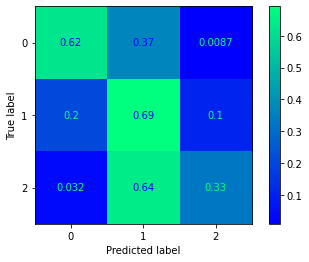

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.69      0.60       420
         1.0       0.61      0.33      0.43       217
		 R2 Score: 0.20191246781905103

Logistic - L1, Train Accuracy = 0.5773353751914242, C=0.33737306612069967
Test Accuracy = 0.5867346938775511


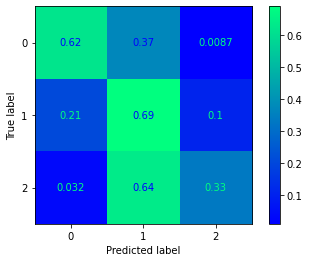

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.66       343
         0.0       0.52      0.69      0.59       420
         1.0       0.61      0.33      0.43       217
		 R2 Score: 0.2000735564545788

Logistic - L1, Train Accuracy = 0.5768249106687086, C=0.4009648697588076
Test Accuracy = 0.5867346938775511


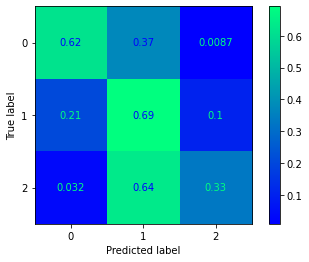

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.65       343
         0.0       0.52      0.69      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.2000735564545788

Logistic - L1, Train Accuracy = 0.5770801429300664, C=0.47654315926683666
Test Accuracy = 0.5846938775510204


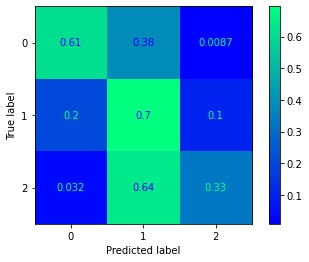

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.19639573372563435

Logistic - L1, Train Accuracy = 0.5773353751914242, C=0.5663672799580199
Test Accuracy = 0.5846938775510204


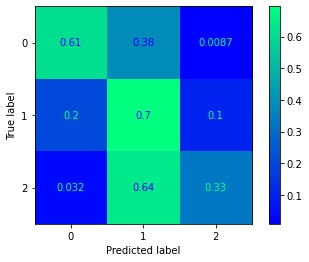

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.19639573372563435

Logistic - L1, Train Accuracy = 0.5770801429300664, C=0.6731224435170884
Test Accuracy = 0.5846938775510204


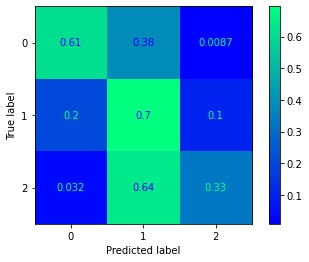

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.19639573372563435

Logistic - L1, Train Accuracy = 0.577590607452782, C=0.8
Test Accuracy = 0.5846938775510204


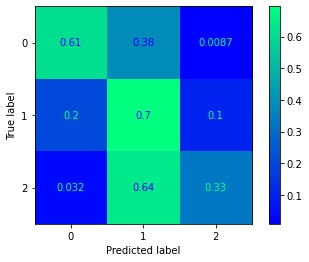

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.19639573372563435



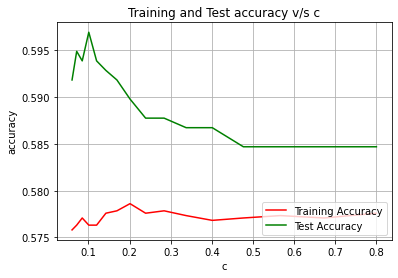

Logistic - L2, Train Accuracy = 0.5778458397141398, C=0.06
Test Accuracy = 0.5928571428571429


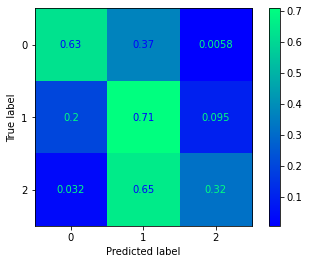

              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66       343
         0.0       0.53      0.71      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.21662375873482886

Logistic - L2, Train Accuracy = 0.5768249106687086, C=0.07130946302904165
Test Accuracy = 0.5928571428571429


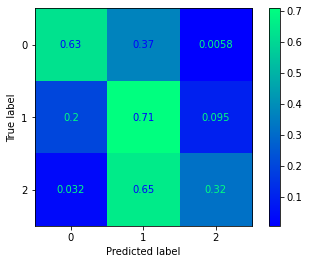

              precision    recall  f1-score   support

        -1.0       0.70      0.63      0.66       343
         0.0       0.53      0.71      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.21662375873482886

Logistic - L2, Train Accuracy = 0.5778458397141398, C=0.08475065862483763
Test Accuracy = 0.5867346938775511


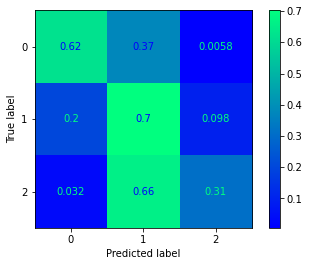

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.70      0.60       420
         1.0       0.61      0.31      0.41       217
		 R2 Score: 0.2055902905479955

Logistic - L2, Train Accuracy = 0.5786115364982134, C=0.10072539929824649
Test Accuracy = 0.5887755102040816


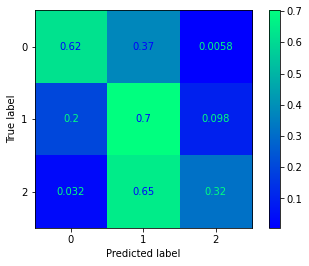

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.20926811327693995

Logistic - L2, Train Accuracy = 0.5801429300663604, C=0.1197112356223961
Test Accuracy = 0.5897959183673469


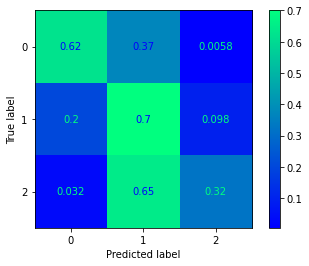

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.32      0.42       217
		 R2 Score: 0.21110702464141218

Logistic - L2, Train Accuracy = 0.5796324655436447, C=0.1422757321796025
Test Accuracy = 0.5897959183673469


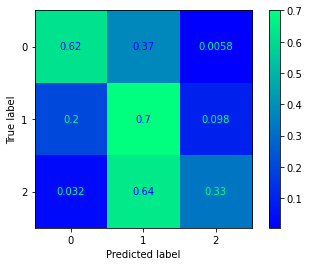

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.21110702464141218

Logistic - L2, Train Accuracy = 0.5809086268504339, C=0.16909343439651997
Test Accuracy = 0.5887755102040816


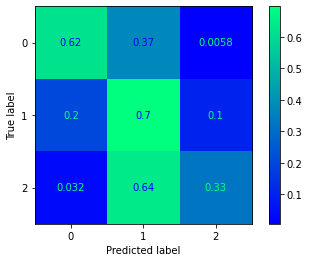

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.70      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.20926811327693995

Logistic - L2, Train Accuracy = 0.5798876978050026, C=0.200966033475872
Test Accuracy = 0.5867346938775511


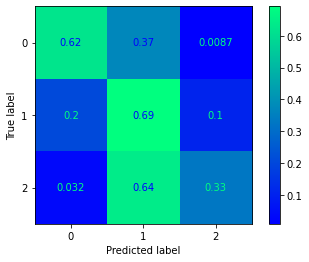

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.69      0.60       420
         1.0       0.61      0.33      0.43       217
		 R2 Score: 0.2000735564545788

Logistic - L2, Train Accuracy = 0.5786115364982134, C=0.23884633223734736
Test Accuracy = 0.5867346938775511


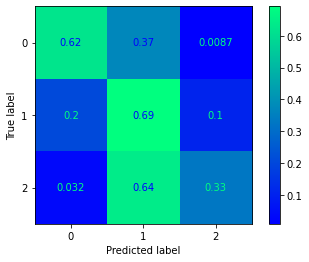

              precision    recall  f1-score   support

        -1.0       0.70      0.62      0.66       343
         0.0       0.52      0.69      0.60       420
         1.0       0.61      0.33      0.43       217
		 R2 Score: 0.2000735564545788

Logistic - L2, Train Accuracy = 0.5781010719754976, C=0.283866728305022
Test Accuracy = 0.5857142857142857


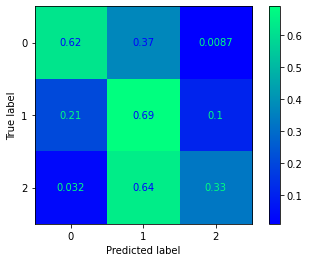

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.66       343
         0.0       0.52      0.69      0.59       420
         1.0       0.61      0.33      0.43       217
		 R2 Score: 0.19823464509010658

Logistic - L2, Train Accuracy = 0.5773353751914242, C=0.33737306612069967
Test Accuracy = 0.5867346938775511


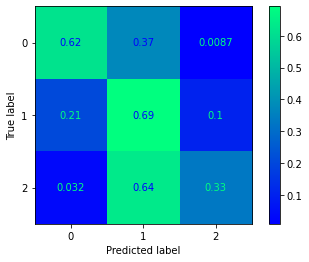

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.65       343
         0.0       0.52      0.69      0.60       420
         1.0       0.62      0.33      0.43       217
		 R2 Score: 0.2000735564545788

Logistic - L2, Train Accuracy = 0.5770801429300664, C=0.4009648697588076
Test Accuracy = 0.5877551020408164


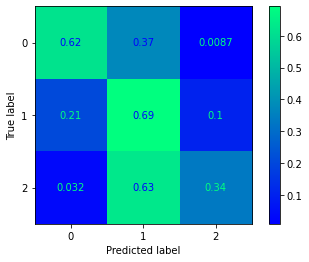

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.65       343
         0.0       0.52      0.69      0.60       420
         1.0       0.62      0.34      0.44       217
		 R2 Score: 0.20191246781905103

Logistic - L2, Train Accuracy = 0.5773353751914242, C=0.47654315926683666
Test Accuracy = 0.5846938775510204


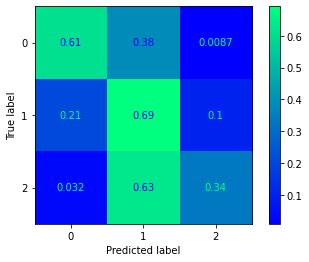

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.69      0.59       420
         1.0       0.62      0.34      0.44       217
		 R2 Score: 0.19639573372563435

Logistic - L2, Train Accuracy = 0.5773353751914242, C=0.5663672799580199
Test Accuracy = 0.5836734693877551


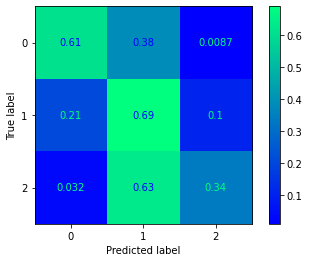

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.69      0.59       420
         1.0       0.61      0.34      0.43       217
		 R2 Score: 0.19455682236116212

Logistic - L2, Train Accuracy = 0.5773353751914242, C=0.6731224435170884
Test Accuracy = 0.5836734693877551


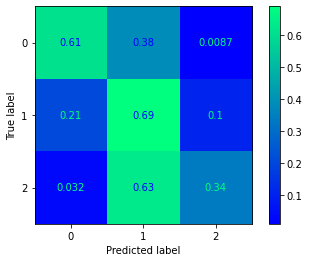

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.69      0.59       420
         1.0       0.61      0.34      0.43       217
		 R2 Score: 0.19455682236116212

Logistic - L2, Train Accuracy = 0.5770801429300664, C=0.8
Test Accuracy = 0.5846938775510204


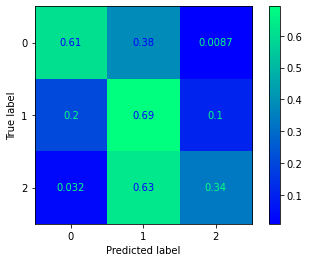

              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       343
         0.0       0.52      0.69      0.59       420
         1.0       0.61      0.34      0.43       217
		 R2 Score: 0.19639573372563435



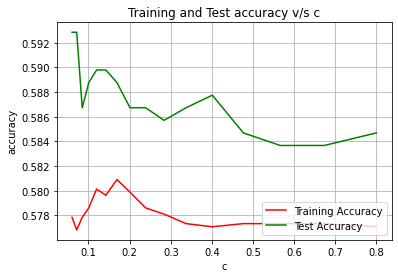

In [122]:
c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

Logistic - L1, Train Accuracy = 0.6031138335885656, C=0.06
Test Accuracy = 0.6030612244897959


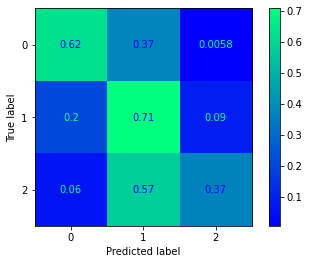

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.65       343
         0.0       0.54      0.71      0.61       420
         1.0       0.67      0.37      0.47       217
		 R2 Score: 0.20191246781905103

Logistic - L1, Train Accuracy = 0.6051556916794283, C=0.07130946302904165
Test Accuracy = 0.6040816326530613


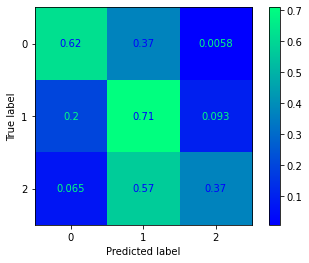

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.65       343
         0.0       0.54      0.71      0.62       420
         1.0       0.66      0.37      0.47       217
		 R2 Score: 0.19823464509010658

Logistic - L1, Train Accuracy = 0.6059213884635017, C=0.08475065862483763
Test Accuracy = 0.610204081632653


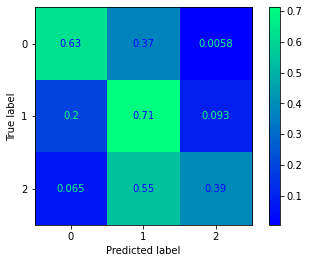

              precision    recall  f1-score   support

        -1.0       0.69      0.63      0.66       343
         0.0       0.55      0.71      0.62       420
         1.0       0.67      0.39      0.49       217
		 R2 Score: 0.20926811327693995

Logistic - L1, Train Accuracy = 0.6049004594180705, C=0.10072539929824649
Test Accuracy = 0.6081632653061224


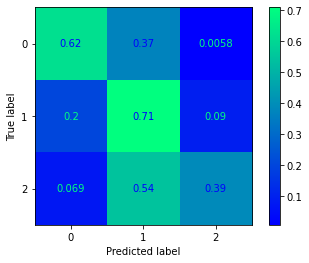

              precision    recall  f1-score   support

        -1.0       0.68      0.62      0.65       343
         0.0       0.55      0.71      0.62       420
         1.0       0.68      0.39      0.49       217
		 R2 Score: 0.2000735564545788

Logistic - L1, Train Accuracy = 0.6069423175089331, C=0.1197112356223961
Test Accuracy = 0.6091836734693877


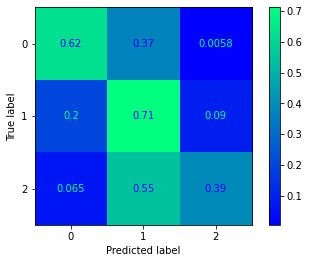

              precision    recall  f1-score   support

        -1.0       0.69      0.62      0.65       343
         0.0       0.55      0.71      0.62       420
         1.0       0.68      0.39      0.49       217
		 R2 Score: 0.20742920191246772



KeyboardInterrupt: 

In [123]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)

# Train All Wines Data

In [ ]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_all)

In [ ]:
c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_logreg, c_logreg2)

In [ ]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

c_logreg = np.geomspace(0.06, 0.8, num=num_of_different_c)
c_logreg2 = np.geomspace(0.06, 0.8, num=num_of_different_c)

train_and_plot(X_transformed_train, y_train, X_transformed_test, y_test, c_logreg, c_logreg2)